### Análisis Exploratorio


In [65]:
#Leemos el dataset
import pandas as pd

# Carga el csv como dataframe de Pandas
df = pd.read_csv("https://docs.google.com/uc?export=download&id=16eXfhJOhG92xYLqFOjkKCoOZ8rXML92c")
df.head()


/tmp/ipykernel_6078/1251327873.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://docs.google.com/uc?export=download&id=16eXfhJOhG92xYLqFOjkKCoOZ8rXML92c")


,session_id,visitNumber,dt_visit,normalized_channelGrouping,normalized_browser,normalized_deviceCategory,normalized_os,revenue_usd,transactions,bounces,...,medium,source,campaign,keyword,page_path,product_sku,product_name,product_category,product_price_usd,product_quantity
0,8X8DIAvZ8iIO+PnR9hbWiA==,1,2017-08-02 05:07:00 UTC,organic search,chrome,desktop,windows,NaN,0,1,...,(none),(direct),(not set),NaN,/google+redesign/bags/more+bags,GGOEGBCR024399,Google Lunch Bag,Home/Bags/More Bags/,13.99,NaN
1,8X8DIAvZ8iIO+PnR9hbWiA==,1,2017-08-02 05:07:00 UTC,organic search,chrome,desktop,windows,NaN,0,1,...,(none),(direct),(not set),NaN,/google+redesign/bags/more+bags,GGOEGBMJ013399,Sport Bag,Home/Bags/More Bags/,4.99,NaN
2,8X8DIAvZ8iIO+PnR9hbWiA==,1,2017-08-02 05:07:00 UTC,organic search,chrome,desktop,windows,NaN,0,1,...,(none),(direct),(not set),NaN,/google+redesign/bags/more+bags,GGOEGBPB021199,Google Slim Utility Travel Bag,Home/Bags/More Bags/,14.99,NaN
3,8X8DIAvZ8iIO+PnR9hbWiA==,1,2017-08-02 05:07:00 UTC,organic search,chrome,desktop,windows,NaN,0,1,...,(none),(direct),(not set),NaN,/google+redesign/bags/more+bags,GGOEGCMB020932,Suitcase Organizer Cubes,Home/Bags/More Bags/,21.99,NaN
4,8X8DIAvZ8iIO+PnR9hbWiA==,1,2017-08-02 05:07:00 UTC,organic search,chrome,desktop,windows,NaN,0,1,...,(none),(direct),(not set),NaN,/google+redesign/bags/more+bags,GGOEGBPB081999,UpCycled Bike Saddle Bag,Home/Bags/More Bags/,49.99,NaN


In [66]:
#Ahora importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [67]:
# 12)Realiza estadísticas descriptivas sobre el dataframe.
# Estadísticas descriptivas
descriptive_stats = df.describe()
print(descriptive_stats)



        visitNumber  revenue_usd  transactions       bounces     pageviews  \
count  47723.000000  4859.000000  47723.000000  47723.000000  47723.000000   
mean       2.725855   347.197094      0.112231      0.134631     18.060327   
std        7.024928   650.842221      0.347082      0.341333     24.547529   
min        1.000000     2.990000      0.000000      0.000000      1.000000   
25%        1.000000    48.850000      0.000000      0.000000      3.000000   
50%        1.000000   137.070000      0.000000      0.000000     10.000000   
75%        2.000000   400.960000      0.000000      0.000000     23.000000   
max      160.000000  2935.610000      2.000000      1.000000    155.000000   

       time_on_site  is_new_visit  product_price_usd  product_quantity  
count  47723.000000  47723.000000       47723.000000       1091.000000  
mean     725.592125      0.655596          23.001594          4.470211  
std     1059.109903      0.475179          28.302116         12.391392  
min  

In [68]:
print("Podemos observar que la media del precio del prodcuto es {} y la mediana es {}".format(df['product_price_usd'].mean(), df['product_price_usd'].median()))

print("El mayor precio de un producto es {}".format(df["product_price_usd"].max()))

Podemos observar que la media del precio del prodcuto es 23.00159430463299 y la mediana es 16.99
El mayor precio de un producto es 950.4


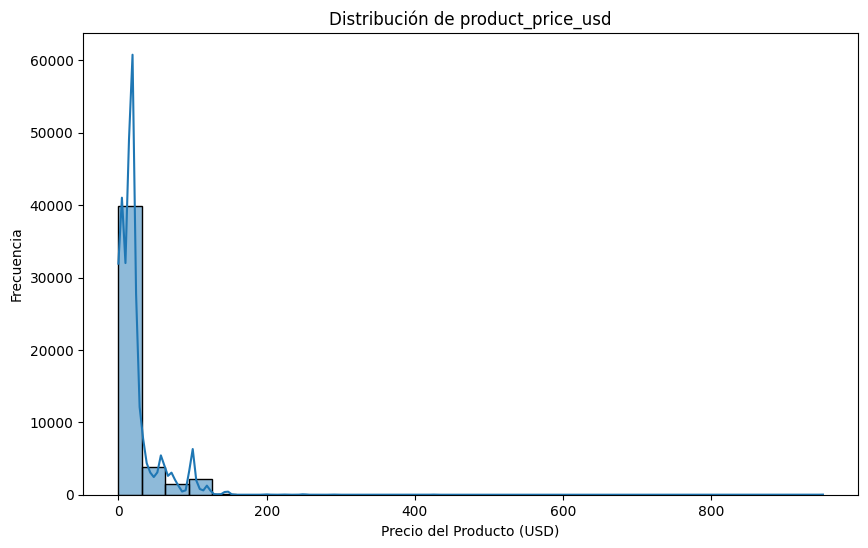

In [69]:
#13 Ejecuta análisis univariables.
# Análisis univariable
# Histograma de la variable product_price_usd
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price_usd'], bins=30, kde=True)
plt.title('Distribución de product_price_usd')
plt.xlabel('Precio del Producto (USD)')
plt.ylabel('Frecuencia')
plt.show()


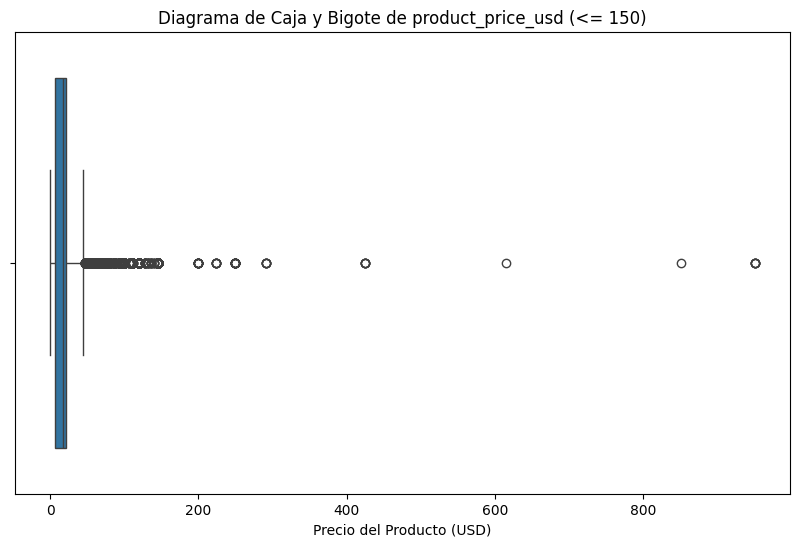

In [70]:
# Diagrama de caja y bigote para observar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['product_price_usd'])
plt.title('Diagrama de Caja y Bigote de product_price_usd (<= 150)')
plt.xlabel('Precio del Producto (USD)')
plt.show()

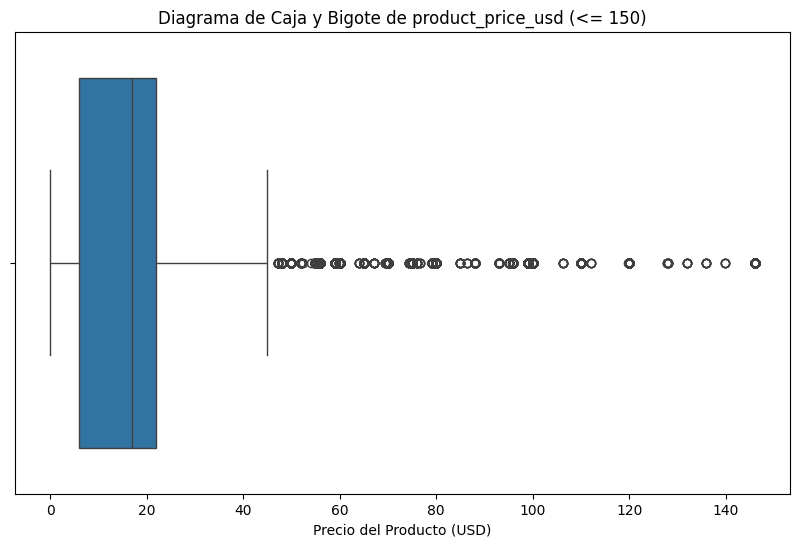

In [71]:
#Como podemos observar hay muchos outliers en la variable product_price_usd, por lo que vamos a filtrar los datos para que solo se muestren los valores menores o iguales a 150 USD.
df_limited = df[df['product_price_usd'] <= 150]

# Diagrama de caja y bigote para observar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limited['product_price_usd'])
plt.title('Diagrama de Caja y Bigote de product_price_usd (<= 150)')
plt.xlabel('Precio del Producto (USD)')
plt.show()



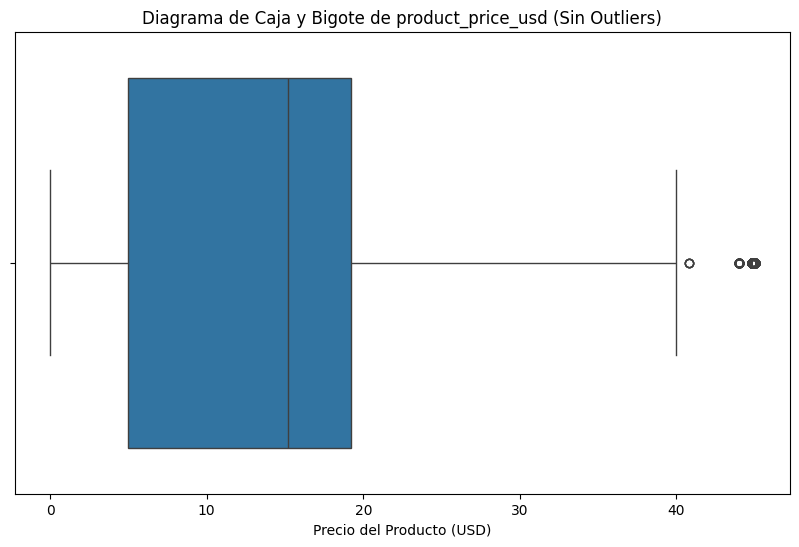

In [72]:
# Calcular los límites para identificar outliers
Q1 = df_limited['product_price_usd'].quantile(0.25)
Q3 = df_limited['product_price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los outliers
df_no_outliers = df_limited[(df_limited['product_price_usd'] >= lower_bound) & (df_limited['product_price_usd'] <= upper_bound)]

# Graficar el diagrama de caja y bigote sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['product_price_usd'])
plt.title('Diagrama de Caja y Bigote de product_price_usd (Sin Outliers)')
plt.xlabel('Precio del Producto (USD)')
plt.show()



In [73]:
#Aqui podemos observar que la variable product_price_usd tiene una distribución asimétrica positiva, lo que significa que la mayoría de los precios de los productos son bajos y hay pocos productos con precios altos. Además, hemos eliminado los outliers para tener una mejor visualización de la distribución de los precios de los productos.

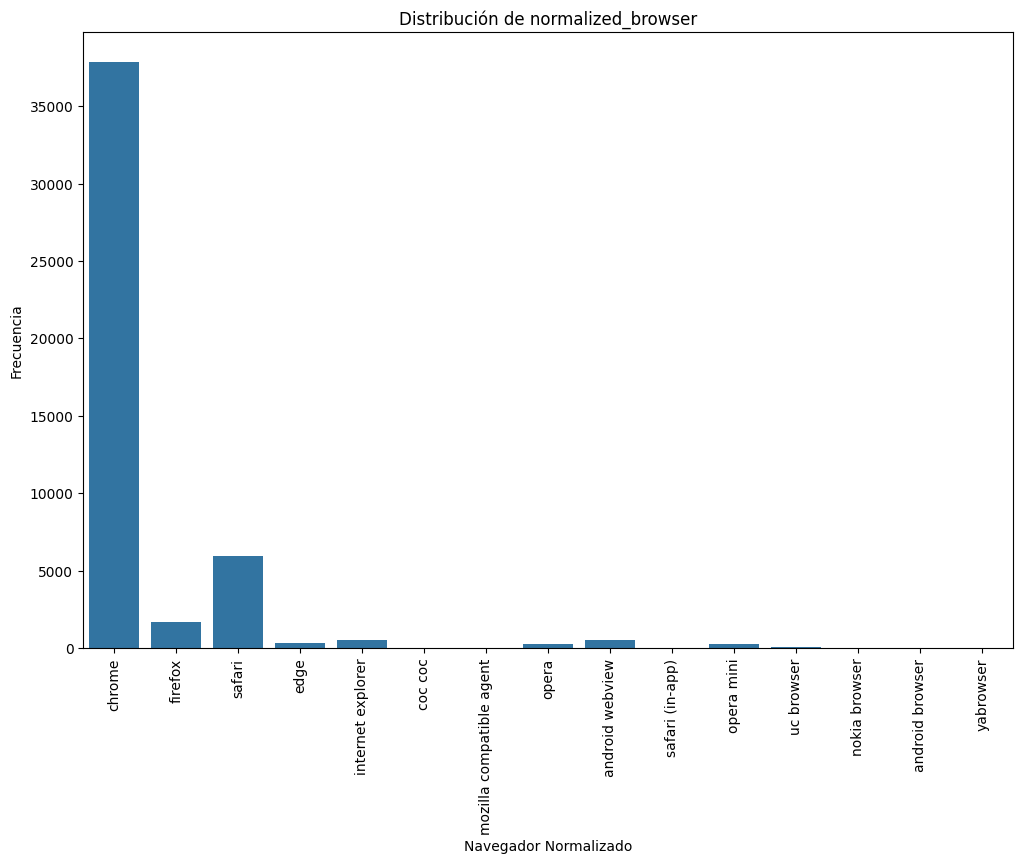

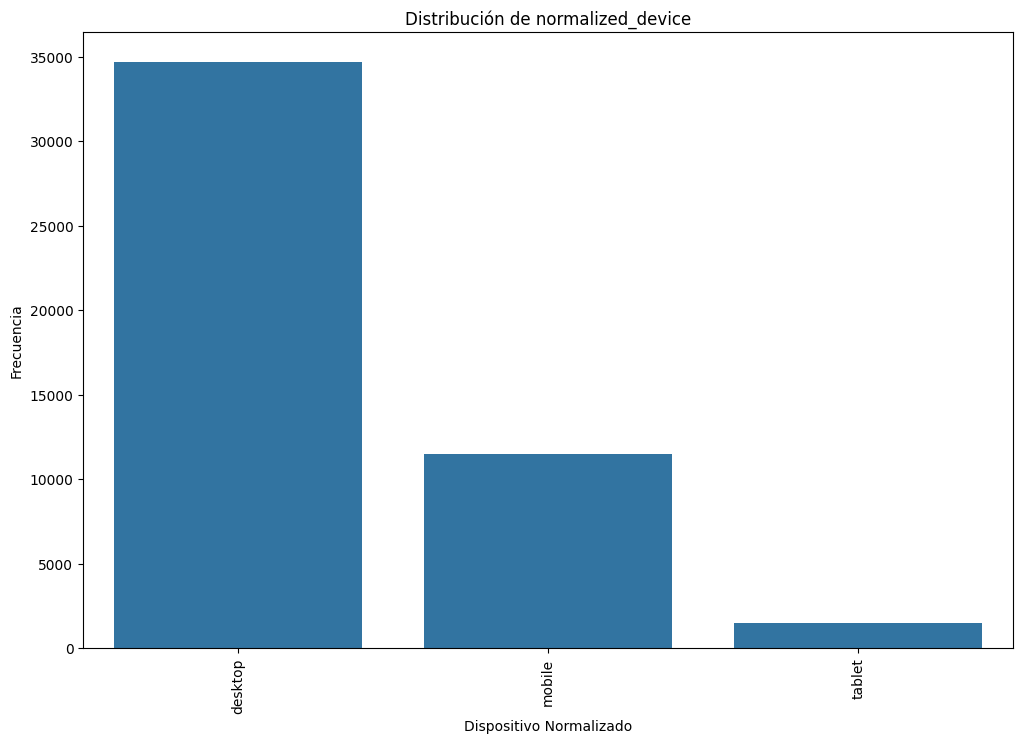

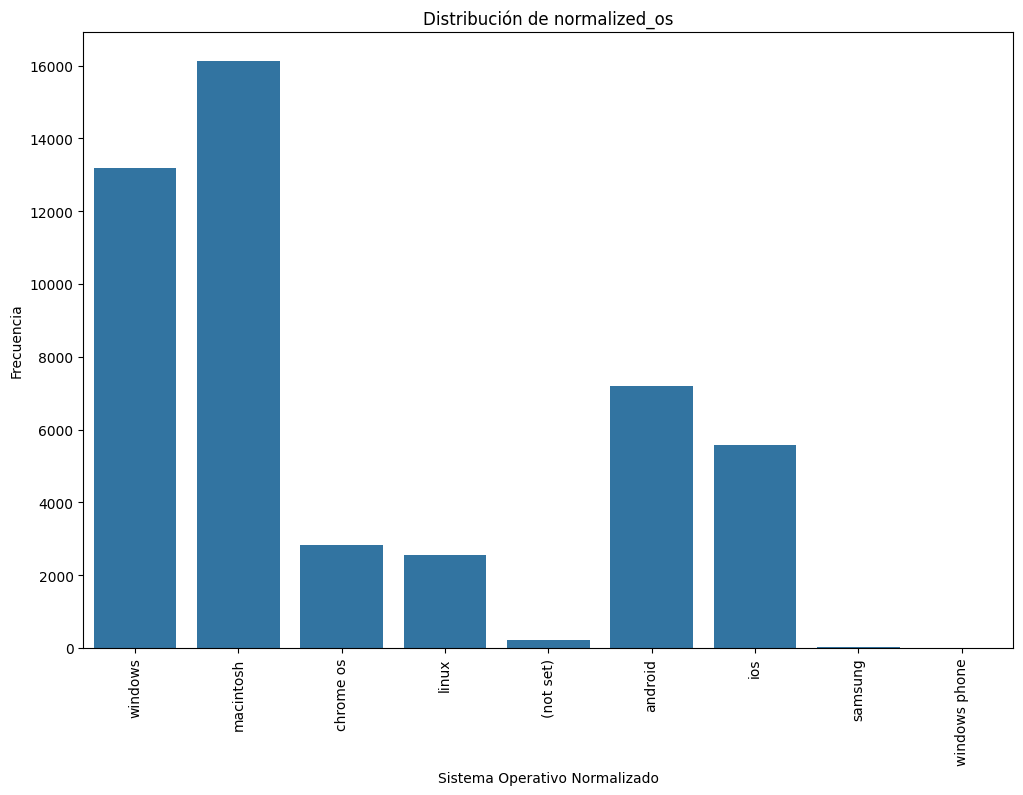

In [74]:
# Distribución de normalized_browser
plt.figure(figsize=(12, 8))
sns.countplot(x='normalized_browser', data=df)
plt.title('Distribución de normalized_browser')
plt.xlabel('Navegador Normalizado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Distribución de normalized_device
plt.figure(figsize=(12, 8))
sns.countplot(x='normalized_deviceCategory', data=df)
plt.title('Distribución de normalized_device')
plt.xlabel('Dispositivo Normalizado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Distribución de normalized_os
plt.figure(figsize=(12, 8))
sns.countplot(x='normalized_os', data=df)
plt.title('Distribución de normalized_os')
plt.xlabel('Sistema Operativo Normalizado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [75]:
print("Podemos observar que la mayoría de los datos se encuentran en la categoría 'desktop' para la variable Dispositivo, en la categoría 'Chrome' para la variable Buscador y en la categoría 'Macintosh' para la variable Sistema Operativo.")

Podemos observar que la mayoría de los datos se encuentran en la categoría 'desktop' para la variable Dispositivo, en la categoría 'Chrome' para la variable Buscador y en la categoría 'Macintosh' para la variable Sistema Operativo.


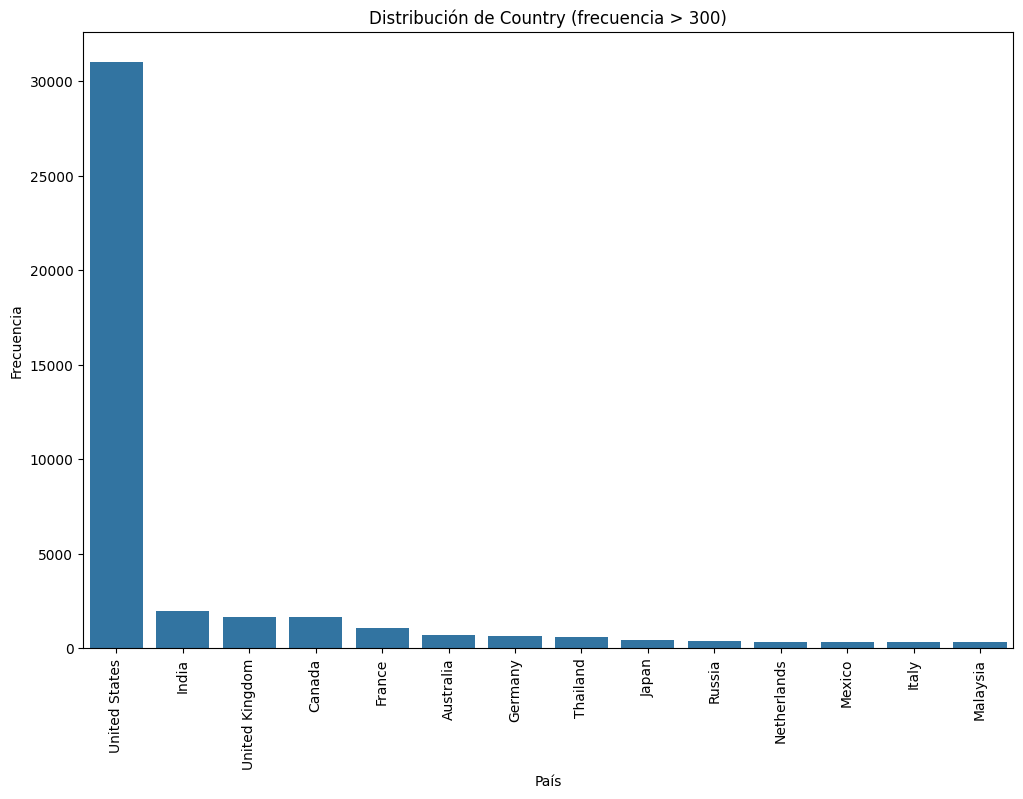

In [76]:
country_counts = df['country'].value_counts()
countries_to_include = country_counts[country_counts > 300].index
df_filtered_country = df[df['country'].isin(countries_to_include)]


# Gráfico de barras para country con frecuencia mayor a 300
plt.figure(figsize=(12, 8))
sns.countplot(x='country', data=df_filtered_country, order=df_filtered_country['country'].value_counts().index)
plt.title('Distribución de Country (frecuencia > 300)')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [77]:
print("Podemos observar que la mayoría de los datos se encuentran en los países 'United States', 'India', 'United Kingdom', 'Canada' y 'Francia'.")

Podemos observar que la mayoría de los datos se encuentran en los países 'United States', 'India', 'United Kingdom', 'Canada' y 'Francia'.


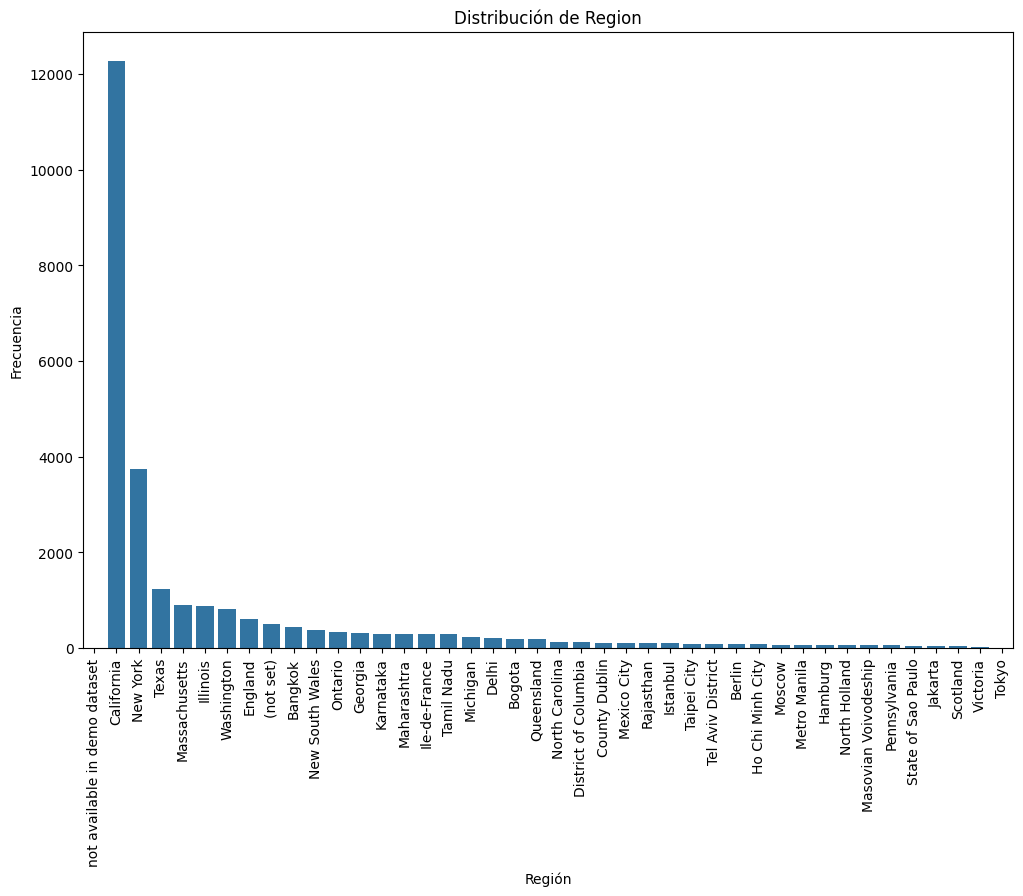

In [78]:
# Gráfico de barras para region


df_filtered_region = df[df['region'] != 'not available in demo dataset']
plt.figure(figsize=(12, 8))
sns.countplot(x='region', data=df_filtered_region, order=df['region'].value_counts().index)
plt.title('Distribución de Region')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [79]:
print("Podemos observar que California es la región con mayor frecuencia en los datos, seguida por New York y Texas.")

Podemos observar que California es la región con mayor frecuencia en los datos, seguida por New York y Texas.


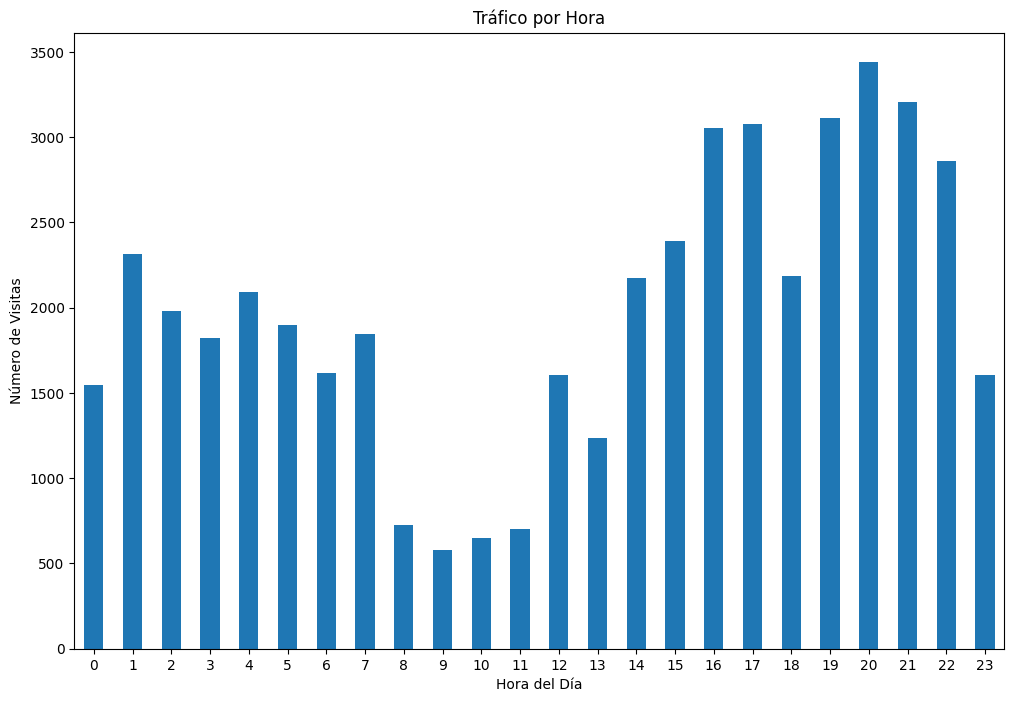

In [80]:
#15) Realiza un análisis temporal del tráfico en el sitio, ¿cómo se ve afectado por hora?

df1 = df.copy()

# Convertir la columna de timestamp a datetime
df1['timestamp'] = pd.to_datetime(df1['dt_visit'])
df1["hour"] = df1["timestamp"].dt.hour
hourly_traffic = df1.groupby('hour').size()



# Graficar el tráfico por hora
plt.figure(figsize=(12, 8))
hourly_traffic.plot(kind='bar')
plt.title('Tráfico por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Visitas')
plt.xticks(rotation=0)
plt.show()

In [81]:
print("Podemos observar que el tráfico en el sitio web varía a lo largo del día, con un pico en las horas de la tarde y una disminución en la madrigada")
print("Esta información puede ser útil para planificar campañas de marketing, publicidad y promociones en momentos específicos del día para maximizar el impacto y la eficacia.")

Podemos observar que el tráfico en el sitio web varía a lo largo del día, con un pico en las horas de la tarde y una disminución en la madrigada
Esta información puede ser útil para planificar campañas de marketing, publicidad y promociones en momentos específicos del día para maximizar el impacto y la eficacia.


### Análisis Estadístico


In [82]:
#17)  Los usuarios que vienen por tráfico directo (Direct) pasan más tiempo en el sitio que los
#que vienen con un link referido (Referral)? Realiza una prueba de hipótesis usando una
#distribución de t-student sobre el tiempo promedio en el sitio para ambos grupos. Usa
#las variables timeonsite y filtra los conjuntos de channelGrouping. Usa un nivel de
#significancia de 0.05.
from scipy.stats import ttest_ind

#  Filtrar los datos para Direct y Referral
df2 = df.copy()

# Asegurándonos de que las variables sean correctas para la prueba
direct_traffic = df2[df2['normalized_channelGrouping'] == 'direct']['time_on_site']
referral_traffic = df2[df2['normalized_channelGrouping'] == 'referral']['time_on_site']

print("Número de observaciones para tráfico directo:", len(direct_traffic))
print("Número de observaciones para tráfico referido:", len(referral_traffic))

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(direct_traffic, referral_traffic, equal_var=False)

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Nivel de significancia
alpha = 0.05

# Interpretar el resultado de la prueba de hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los usuarios que vienen por Referral pasan más tiempo en el sitio que los que vienen por Direct.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que los usuarios que vienen por Referral pasan más tiempo en el sitio que los que vienen por Direct.")

Número de observaciones para tráfico directo: 7117
Número de observaciones para tráfico referido: 11771
T-statistic: -9.952235400106199
P-value: 2.866579879526318e-23
Rechazamos la hipótesis nula: Los usuarios que vienen por Referral pasan más tiempo en el sitio que los que vienen por Direct.


In [83]:
#18) Repite el ejercicio para los grupos Affiliates y Social

df3 = df.copy()

# Asegurándonos de que las variables sean correctas para la prueba
afiliates_traffic = df3[df3['normalized_channelGrouping'] == 'affiliates']['time_on_site']
social_traffic = df3[df3['normalized_channelGrouping'] == 'social']['time_on_site']



# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(afiliates_traffic, social_traffic, equal_var=False)

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Nivel de significancia
alpha = 0.05

# Interpretar el resultado de la prueba de hipótesis

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los usuarios que vienen por Affiliates pasan más tiempo en el sitio que los que vienen por Social.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que los usuarios que vienen por Affiliates pasan más tiempo en el sitio que los que vienen por Social.")

T-statistic: 11.603608157168305
P-value: 7.715052734049973e-26
Rechazamos la hipótesis nula: Los usuarios que vienen por Affiliates pasan más tiempo en el sitio que los que vienen por Social.


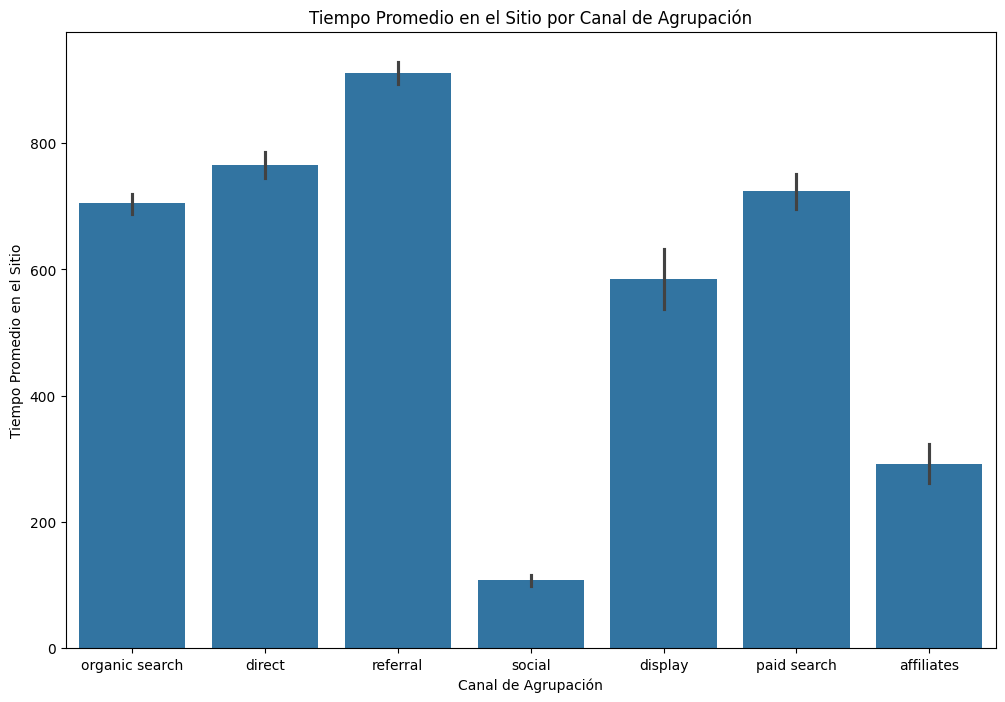

In [84]:
#grafico de barras time_on_site segun channelGrouping
plt.figure(figsize=(12, 8))
sns.barplot(x='normalized_channelGrouping', y='time_on_site', data=df)
plt.title('Tiempo Promedio en el Sitio por Canal de Agrupación')
plt.xlabel('Canal de Agrupación')
plt.ylabel('Tiempo Promedio en el Sitio')
plt.show()


In [85]:
print("Podemos observar que los usuarios que vienen por  referido pasan más tiempo en el sitio que los que vienen con un enlace directo, mientras que los usuarios que vienen por Affiliates pasan más tiempo en el sitio que los que vienen por Social.")
print("Ambas conclusiones coinciden con los resultados obtenidos en las pruebas de hipótesis anteriores.")

Podemos observar que los usuarios que vienen por  referido pasan más tiempo en el sitio que los que vienen con un enlace directo, mientras que los usuarios que vienen por Affiliates pasan más tiempo en el sitio que los que vienen por Social.
Ambas conclusiones coinciden con los resultados obtenidos en las pruebas de hipótesis anteriores.


Coeficiente de correlación de Spearman entre Pageviews y Total Transaction Revenue: 0.32377193389974124
Coeficiente de correlación de Pearson entre Pageviews y Total Transaction Revenue: 0.10616243142426737


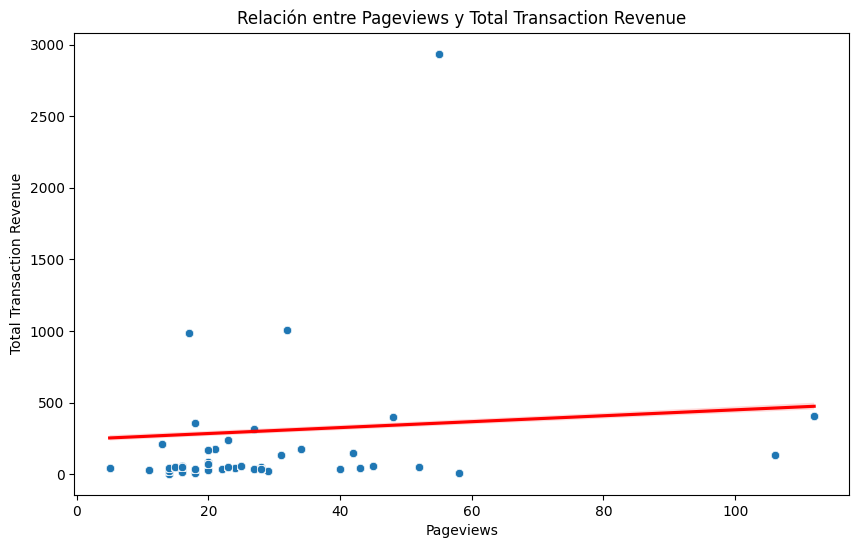

In [86]:
correlation = df[['pageviews', 'revenue_usd']].corr(method='spearman')
print(f"Coeficiente de correlación de Spearman entre Pageviews y Total Transaction Revenue: {correlation.iloc[0, 1]}")

correlation2 = df[['pageviews', 'revenue_usd']].corr(method='pearson')
print(f"Coeficiente de correlación de Pearson entre Pageviews y Total Transaction Revenue: {correlation2.iloc[0, 1]}")


# Graficar la relación entre pageviews y totaltransactionrevenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pageviews', y='revenue_usd', data=df)
sns.regplot(x='pageviews', y='revenue_usd', data=df, scatter=False, color='red')
plt.title('Relación entre Pageviews y Total Transaction Revenue')
plt.xlabel('Pageviews')
plt.ylabel('Total Transaction Revenue')
plt.show()





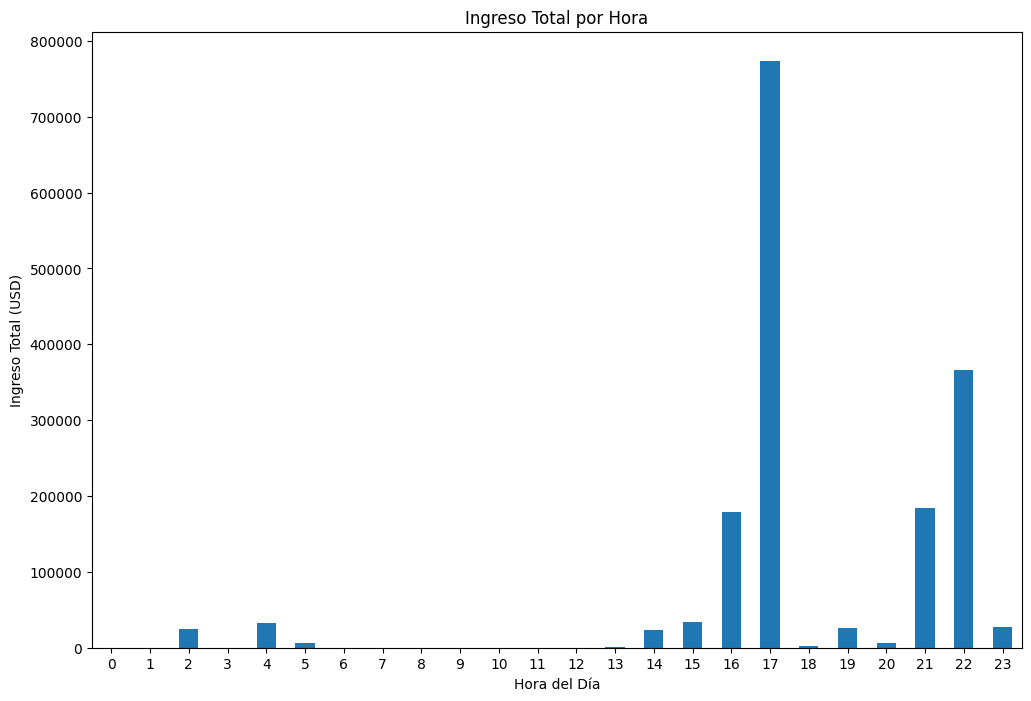

In [88]:
#Ingreso por hora
# Calcular el ingreso total por hora

df4 = df.copy()

# Convertir la columna de timestamp a datetime
df4['timestamp'] = pd.to_datetime(df4['dt_visit'])
df4["hour"] = df4["timestamp"].dt.hour
hourly_revenue = df4.groupby('hour')['revenue_usd'].sum()

# Graficar el ingreso total por hora
plt.figure(figsize=(12, 8))
hourly_revenue.plot(kind='bar')
plt.title('Ingreso Total por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Ingreso Total (USD)')
plt.xticks(rotation=0)
plt.show()


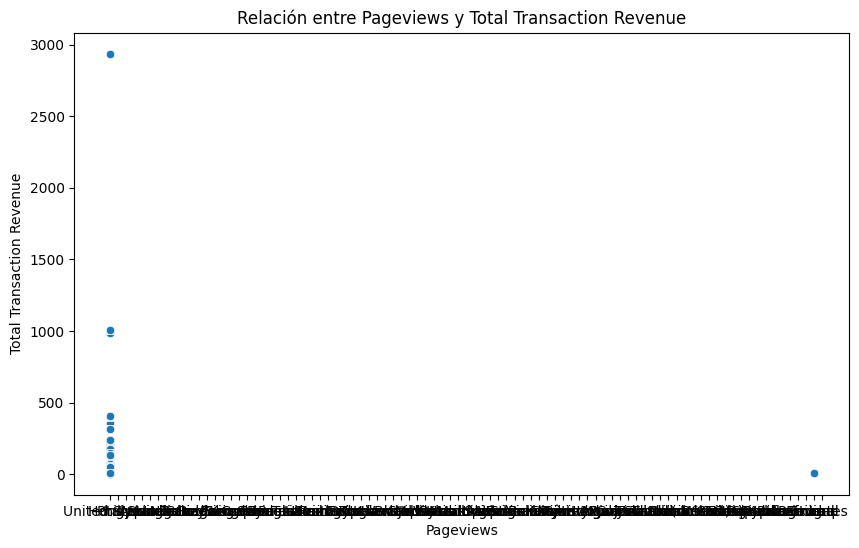

In [93]:
#ingreso por pais
# Calcular el ingreso total por país

df6 = df.copy()

# Graficar la relación entre pageviews y totaltransactionrevenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country', y='revenue_usd', data=df)
plt.title('Relación entre Pageviews y Total Transaction Revenue')
plt.xlabel('Pageviews')
plt.ylabel('Total Transaction Revenue')
plt.show()


country
United States           1686952.81
Finland                      77.87
Argentina                     0.00
Algeria                       0.00
Austria                       0.00
                           ...    
Turkey                        0.00
United Arab Emirates          0.00
United Kingdom                0.00
Venezuela                     0.00
Vietnam                       0.00
Name: revenue_usd, Length: 89, dtype: float64


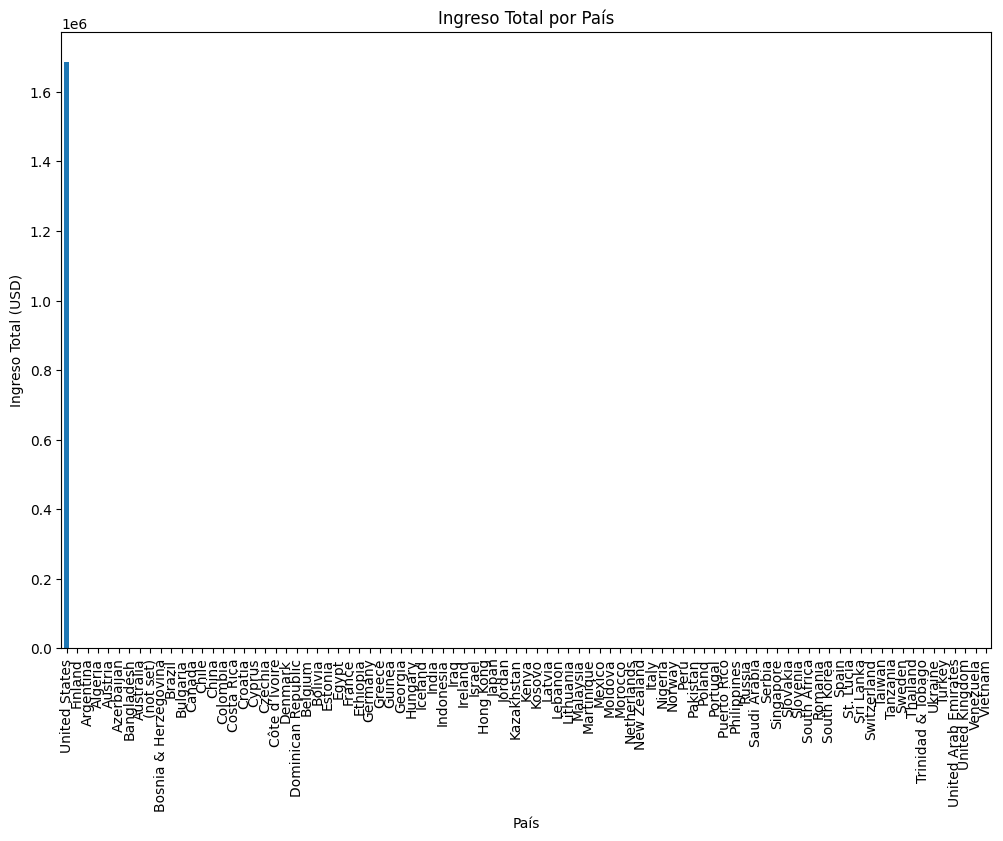

In [ ]:
df6 = df.copy()

country_with_revenue = df6.groupby('country')['revenue_usd'].sum().sort_values(ascending=False)
print(country_with_revenue)

